# Diagnóstico de diabetes
## Base de dados

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [2]:
# Biblioteca para importar arquivos
import pandas as pd
# Biblioteca para realizar computação científica e numérica
import numpy as np
# Biblioteca para criar gráficos 2D de forma rápida e fácil
import matplotlib.pyplot as plt
# Biblioteca para visualizações de dados estatísticos atraentes e informativas
import seaborn as sns

In [3]:
# Carregar base de dados
df = pd.read_csv('/content/diabetes.csv')
# Exibir as 5 primeiras linhas com intuito de verificar se o arquivo carregou corretamente
df.head()

,Gestacoes,Glicose,Pressao arterial,Espessura da pele,Insulin,IMC,Funcao historico familiar,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Exibe quantidade e tipos de registro de cada coluna
df.info(show_counts=True)
# Para essa base de dados não será necessário tratar os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gestacoes                  768 non-null    int64  
 1   Glicose                    768 non-null    int64  
 2   Pressao arterial           768 non-null    int64  
 3   Espessura da pele          768 non-null    int64  
 4   Insulin                    768 non-null    int64  
 5   IMC                        768 non-null    float64
 6   Funcao historico familiar  768 non-null    float64
 7   Idade                      768 non-null    int64  
 8   Resultado                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Verificar se existe dados duplicados
df[df.duplicated()]
# Para essa base de dados não existe dados duplicados

,Gestacoes,Glicose,Pressao arterial,Espessura da pele,Insulin,IMC,Funcao historico familiar,Idade,Resultado


## Análise Exploratória
### Estatísitca
### Gráficos
- Direcionar com perguntas

In [6]:
# Exibir resumo estatístico de todas as colunas de um DataFrame
df.describe(include='all')

# Foi identificado nessa base de dados que as informações abaixo são incorretas
# Pressão arterial = 0
# Insulina = 0

,Gestacoes,Glicose,Pressao arterial,Espessura da pele,Insulin,IMC,Funcao historico familiar,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# Condicional para remover conteúdo desnecessário
condition = (df['Pressao arterial'] > 1) & (df['Insulin'] > 1)
# Filtra base de dados
df_filtered = df[condition]
# Exibir resumo estatístico dos dados filtrados
df_filtered.describe(include='all')

,Gestacoes,Glicose,Pressao arterial,Espessura da pele,Insulin,IMC,Funcao historico familiar,Idade,Resultado
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


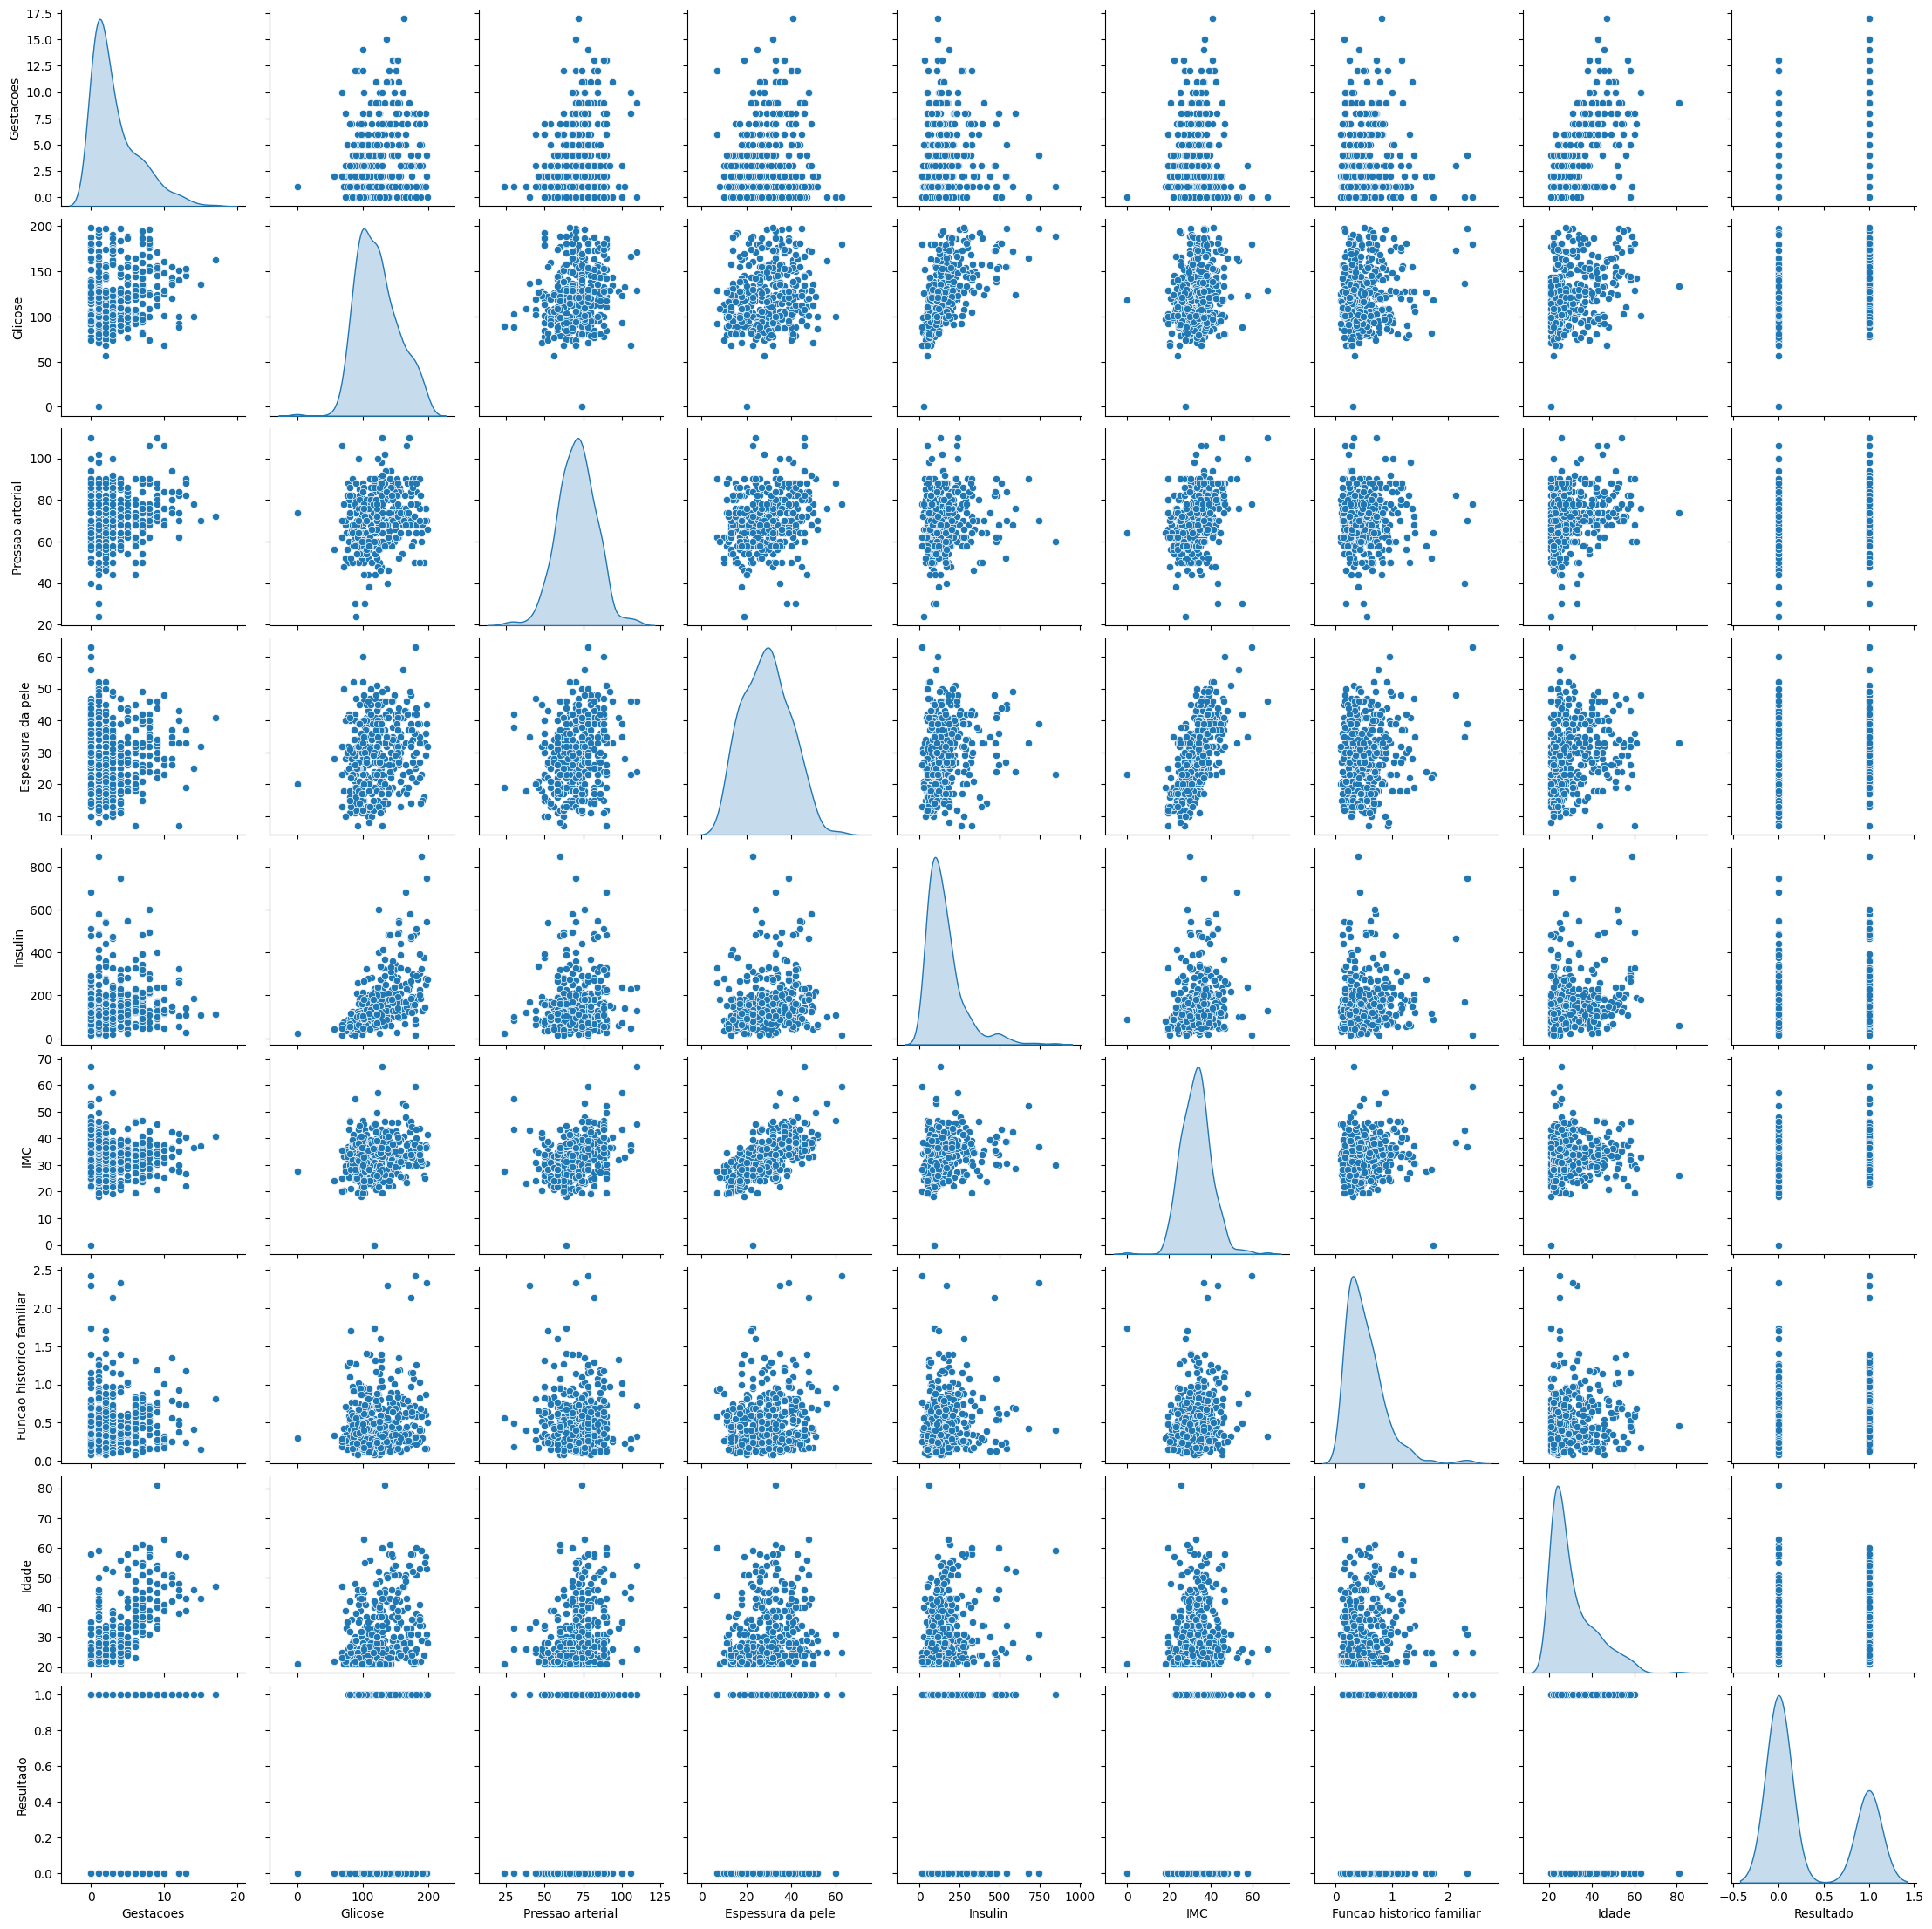

In [8]:
# Criar matriz de gráficos de dispersão para visualiza as relações pareadas entre múltiplas variáveis numéricas em um conjunto de dados
sns.pairplot(df_filtered, diag_kind='kde')

Baseado nos dados exibidos no pairplot percebemos que as relações entre Glicose e IMC mais alta e número de gestações aparentemente impactam em ter ou não a doença

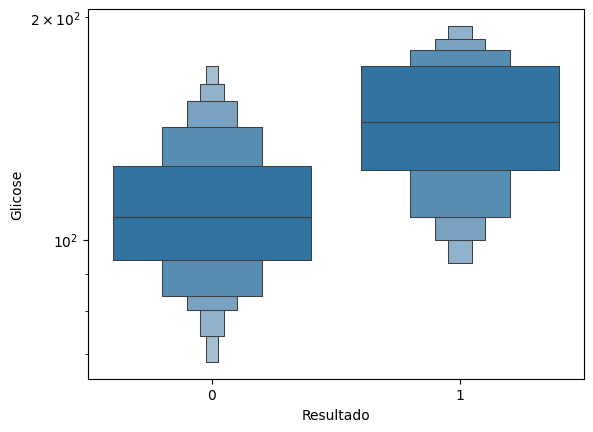

In [9]:
# Grafico para verificar comparativo em possuir ou não a doença em relação a Glicose
sns.boxenplot(x='Resultado', y= 'Glicose', data=df_filtered, showfliers=False)
plt.yscale('log')
plt.show()

Através do gráfico, foi possível de verificar que é mais recorrente a doença entre pessoas com Glicose mais alta

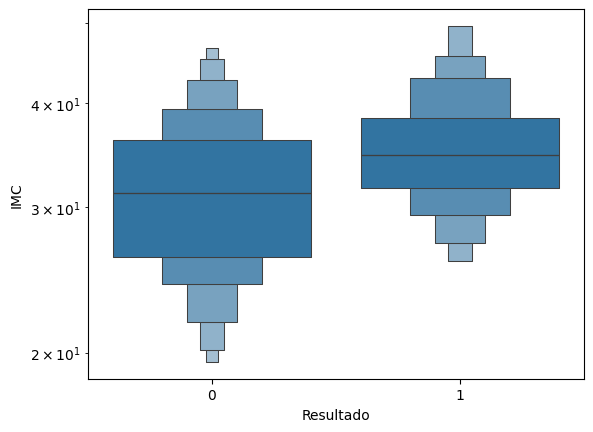

In [10]:
# Grafico para verificar comparativo em possuir ou não a doença em relação ao IMC
sns.boxenplot(x='Resultado', y= 'IMC', data=df_filtered, showfliers=False)
plt.yscale('log')
plt.show()

Através do gráfico, foi possível de verificar que é mais recorrente a doença entre pessoas com IMC maior ou igual a 30

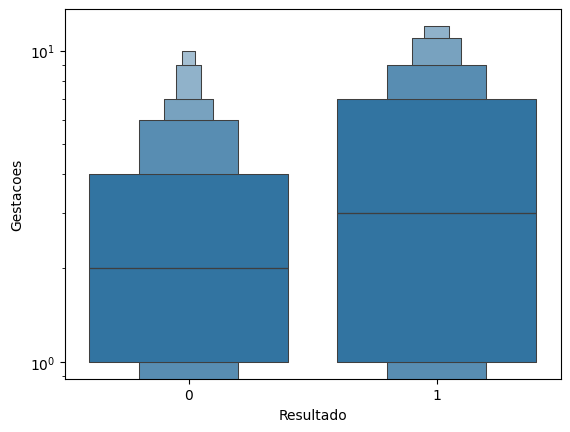

In [11]:
# Grafico para verificar comparativo em possuir ou não a doença em relação a Gestações
sns.boxenplot(x='Resultado', y= 'Gestacoes', data=df_filtered, showfliers=False)
plt.yscale('log')
plt.show()

Através do gráfico, foi possível de verificar que é mais recorrente a doença entre pessoas que tiveram mais de 3 gestações

<Axes: xlabel='Resultado', ylabel='count'>

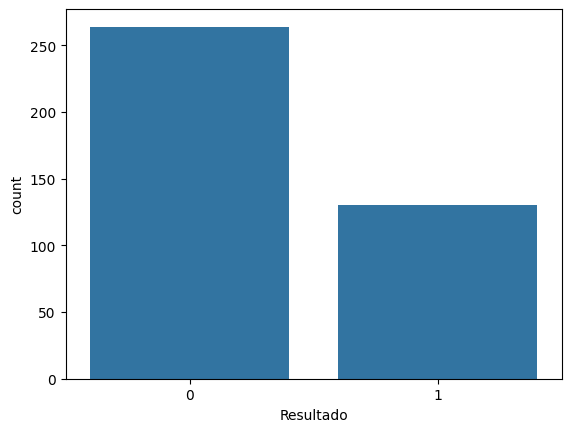

In [12]:
# Qual a proporção de pessoas que possuem ou não diabetes
sns.countplot(df_filtered, x='Resultado')

In [13]:
# Visualizar a proporção de pessoas que possuem ou não a doença em relação a Percentual
counts = df_filtered['Resultado'].value_counts().sort_index()
total = counts.sum()
proportions = counts / total
print(proportions)

Resultado
0    0.670051
1    0.329949
Name: count, dtype: float64


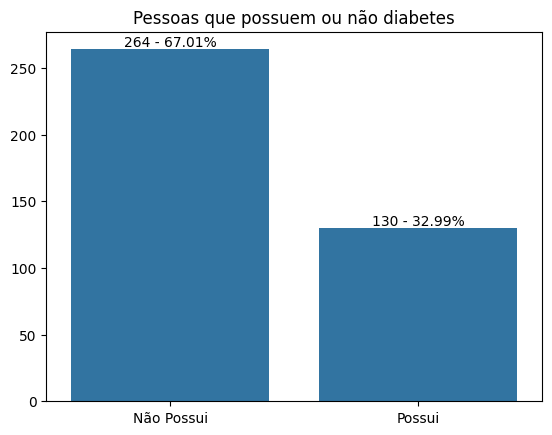

In [14]:
# Exibir graficamente o percentual
ax = sns.barplot(x=['Não Possui', 'Possui'], y=counts.values)
ax.set_title('Pessoas que possuem ou não diabetes')
for i, (count, percent) in enumerate(zip(counts, proportions * 100)):
  ax.text(i, count, f'{count:,} - {percent:.2f}%', ha='center', va='bottom')
plt.show()

Basedo nos resultados desse Dataset, 67.01% não possuem a doença e 32.99% possuem

O IBGE divulgou os resultados do Censo 2022, indicando que a população do Brasil é formada por 203.080.756 pessoas. Isso indica também que a estimativa sobre o número de pessoas com diabetes no Brasil passaria a ser de aproximadamente 20 milhões, já que o último Vigitel, levantamento em amostra representativa da população brasileira feito pelo Ministério da Saúde, apontou que, no conjunto de 27 capitais pesquisadas, a frequência do diagnóstico autorreferido de diabetes foi de 10.20%.

Porem como não possuimos uma base de dados do Ministério da Saúde para podermos analisar, continuaremos utilizando essa base de dados.

<Axes: >

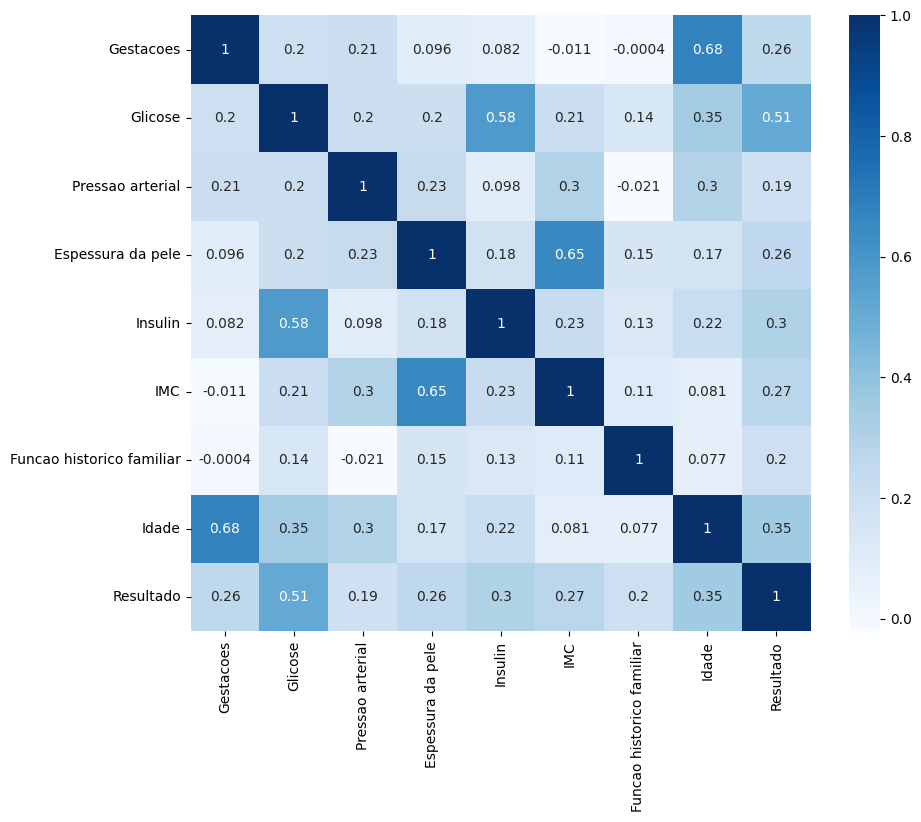

In [15]:
# Criar gráfico de correlação
corr = df_filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues')

Foi possível visualizar que os campos abaixo se correlacionam
Idade e Número de gestações -> 0.68
IMC e Espessura da pelo -> 0.65
Glicose e Insulina -> 0.58
Glicose e Resultado -> 0.51

## Criação dos modelos

In [16]:
# Remover coluna resultado
X = df_filtered.drop('Resultado', axis=1)
# Criar variável que contenha os resultados
y = df_filtered['Resultado']

In [17]:
# Dividir um conjunto de dados em dois subconjuntos: um para treinamento e outro para teste de um modelo de machine learning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Criar modelo Arvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        53
           1       0.64      0.69      0.67        26

    accuracy                           0.77        79
   macro avg       0.74      0.75      0.75        79
weighted avg       0.78      0.77      0.77        79



###Análise classe por classe

---

1. Classe 0: Não possui diabetes

* Precision: Das previsões, 84% estavam corretas
* Recall:	O modelo conseguiu identificar 81% dos casos reais
* F1-score:	0.83 Bom equilíbrio entre precisão e recall
* Support: Havia 53 exemplos reais

2. Classe 1: Possui doença
* Precision: Das previsões, 64% estavam corretas
* Recall:	O modelo detecta apenas 69% dos casos reais
* F1-score: 0.67 Desempenho mediano; há muitos falsos negativos e/ou falsos positivos
* Support: Havia 26 exemplos reais

### Métricas globais
* accuracy: O modelo acerta 77% de todas as previsões
* macro avg:	Média simples entre classes (não leva em conta o número de amostras) → boa para avaliar equilíbrio entre classes
* weighted avg:	Média ponderada pelo número de amostras → melhor para medir o desempenho geral, considerando que há mais amostras Não possuir a doença

### Interpretação geral

* O modelo tem desempenho bom na classe 0 (maioria dos dados)
* Classe "Possui doença" é mais difícil — recall e f1 estão baixos
* Accuracy de 77% parece boa, mas é influenciada pelo desbalanceamento
* Macro F1 = 0.75 mostra que o modelo ainda pode melhorar para equilibrar as duas classes

  0%|          | 0/79 [00:00<?, ?it/s]

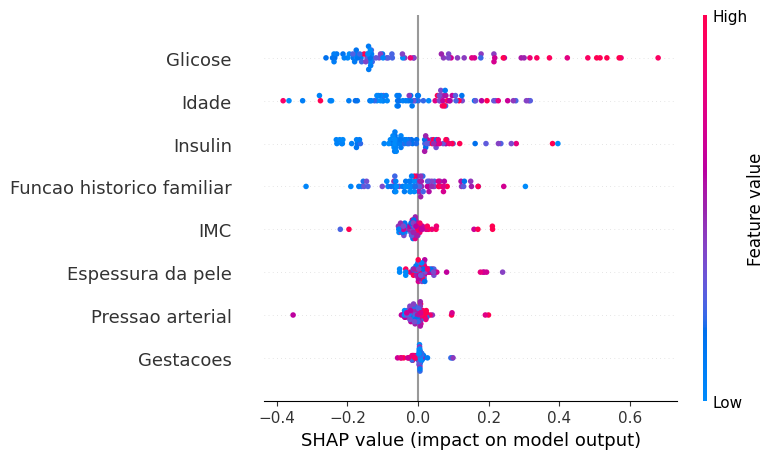

In [21]:
import shap
explainer = shap.KernelExplainer(dt_model.predict, pd.DataFrame(X_train))
shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names)
shap.summary_plot(shap_values, X_test)

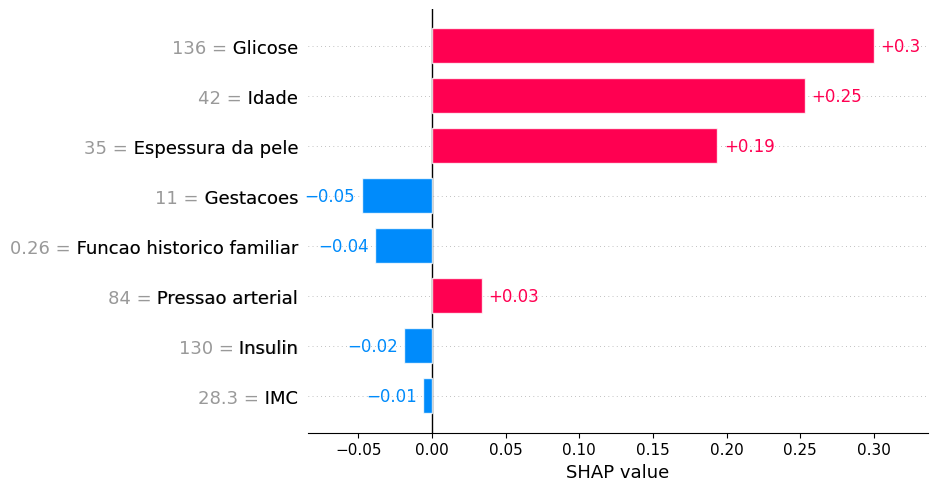

In [22]:
shap.plots.bar(shap_values[3])

In [23]:
# Criar modelo Regressão Logística
from sklearn.linear_model import LogisticRegression
dt_linear_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'  # ou 'saga'
)
dt_linear_model.fit(X_train, y_train)
y_linear_pred_dt = dt_linear_model.predict(X_test)
print(classification_report(y_test, y_linear_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.78      0.69      0.73        26

    accuracy                           0.84        79
   macro avg       0.82      0.80      0.81        79
weighted avg       0.83      0.84      0.83        79



###Análise classe por classe

---

1. Classe 0: Não possui diabetes

* Precision: Das previsões, 86% estavam corretas
* Recall:	O modelo conseguiu identificar 91% dos casos reais
* F1-score:	0.88 Bom equilíbrio entre precisão e recall
* Support: Havia 53 exemplos reais

2. Classe 1: Possui doença
* Precision: Das previsões, 78% estavam corretas
* Recall:	O modelo detecta apenas 69% dos casos reais
* F1-score: 0.73 Desempenho mediano; há muitos falsos negativos e/ou falsos positivos
* Support: Havia 26 exemplos reais

### Métricas globais
* accuracy: O modelo acerta 84% de todas as previsões
* macro avg:	Média simples entre classes (não leva em conta o número de amostras) → boa para avaliar equilíbrio entre classes
* weighted avg:	Média ponderada pelo número de amostras → melhor para medir o desempenho geral, considerando que há mais amostras Não possuir a doença

### Interpretação geral

* O modelo tem desempenho bom na classe 0 (maioria dos dados)
* Classe "Possui doença" é mais difícil — recall e f1 estão baixos
* Accuracy de 84% parece boa, mas é influenciada pelo desbalanceamento
* Macro F1 = 0.81 mostra que o modelo ainda pode melhorar para equilibrar as duas classes

  0%|          | 0/79 [00:00<?, ?it/s]

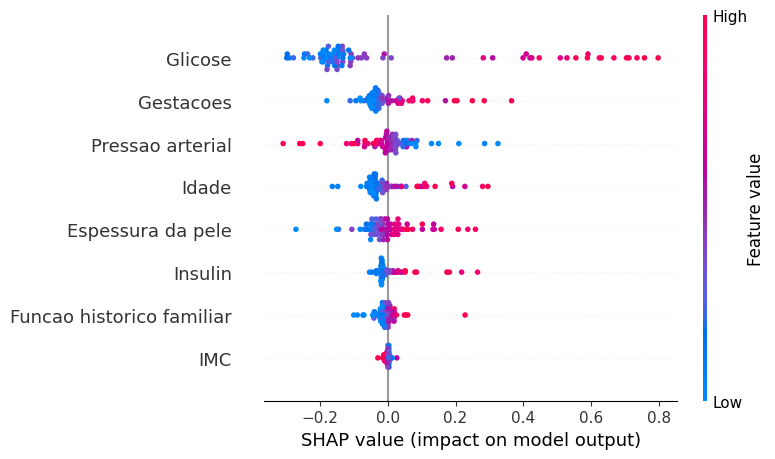

In [24]:
explainer_linear = shap.KernelExplainer(dt_linear_model.predict, pd.DataFrame(X_train))
shap_linear_values = explainer_linear(X_test)
#shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names)
shap.summary_plot(shap_linear_values, X_test)

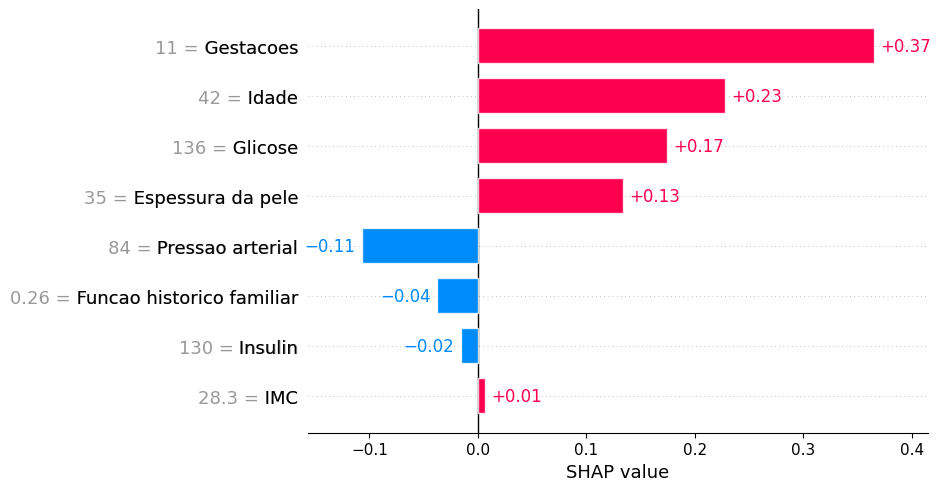

In [25]:
shap.plots.bar(shap_linear_values[3])

In [26]:
# Criar modelo Rede Neural Multicamadas (MLP)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Escalar os dados — essencial para redes neurais
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar o modelo de rede neural
nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # duas camadas ocultas
    activation='relu',            # função de ativação
    solver='adam',                # otimizador
    max_iter=1000,                # número máximo de iterações
    random_state=42
)

# Treinar
nn_model.fit(X_train_scaled, y_train)

# Prever
y_pred_nn = nn_model.predict(X_test_scaled)

# Avaliar
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        53
           1       0.65      0.77      0.70        26

    accuracy                           0.78        79
   macro avg       0.76      0.78      0.77        79
weighted avg       0.80      0.78      0.79        79



###Análise classe por classe

---

1. Classe 0: Não possui diabetes

* Precision: Das previsões, 88% estavam corretas
* Recall:	O modelo conseguiu identificar 79% dos casos reais
* F1-score:	0.83 Bom equilíbrio entre precisão e recall
* Support: Havia 53 exemplos reais

2. Classe 1: Possui doença
* Precision: Das previsões, 65% estavam corretas
* Recall:	O modelo detecta apenas 77% dos casos reais
* F1-score: 0.70 Desempenho mediano; há muitos falsos negativos e/ou falsos positivos
* Support: Havia 26 exemplos reais

### Métricas globais
* accuracy: O modelo acerta 78% de todas as previsões
* macro avg:	Média simples entre classes (não leva em conta o número de amostras) → boa para avaliar equilíbrio entre classes
* weighted avg:	Média ponderada pelo número de amostras → melhor para medir o desempenho geral, considerando que há mais amostras Não possuir a doença

### Interpretação geral

* O modelo tem desempenho bom na classe 0 (maioria dos dados)
* Classe "Possui doença" é mais difícil — recall e f1 estão baixos
* Accuracy de 78% parece boa, mas é influenciada pelo desbalanceamento
* Macro F1 = 0.77 mostra que o modelo ainda pode melhorar para equilibrar as duas classes

  0%|          | 0/79 [00:00<?, ?it/s]

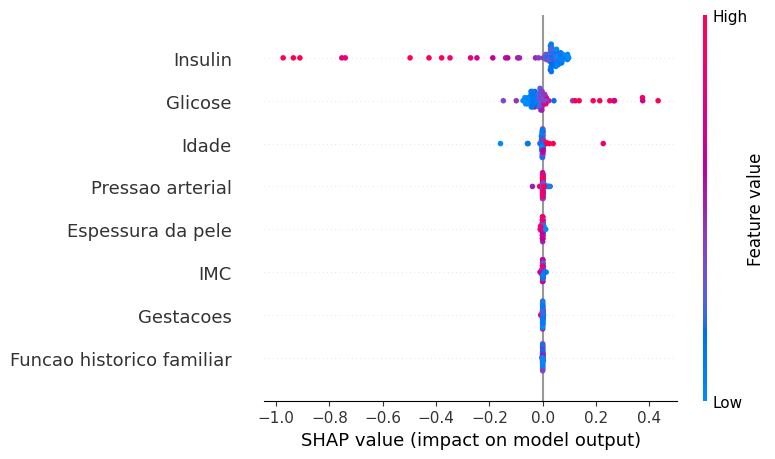

In [27]:
explainer_mlp = shap.KernelExplainer(nn_model.predict, pd.DataFrame(X_train))
shap_mlp_values = explainer_mlp(X_test)
#shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names)
shap.summary_plot(shap_mlp_values, X_test)

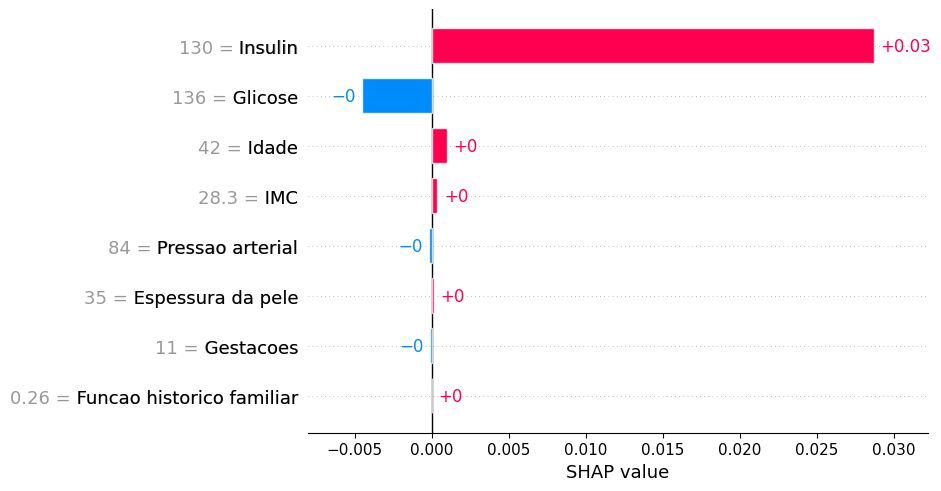

In [28]:
shap.plots.bar(shap_mlp_values[3])